In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df_siec = pd.read_csv("df_siec.csv")

agregados = ["EU27_2020", "EU28", "EA19", "EA20", "EA", "EFTA", "EU15", "EU25", "EU27"]
df_siec = df_siec[~df_siec["geo"].isin(agregados)].copy()

exclude_cols = ["geo", "TIME_PERIOD", "PIB_growth_pct"]
siec_cols = [c for c in df_siec.columns if c not in exclude_cols]

df_siec_log = df_siec.copy()
df_siec_log[siec_cols] = df_siec_log[siec_cols].clip(lower=0)
df_siec_log[siec_cols] = np.log1p(df_siec_log[siec_cols])

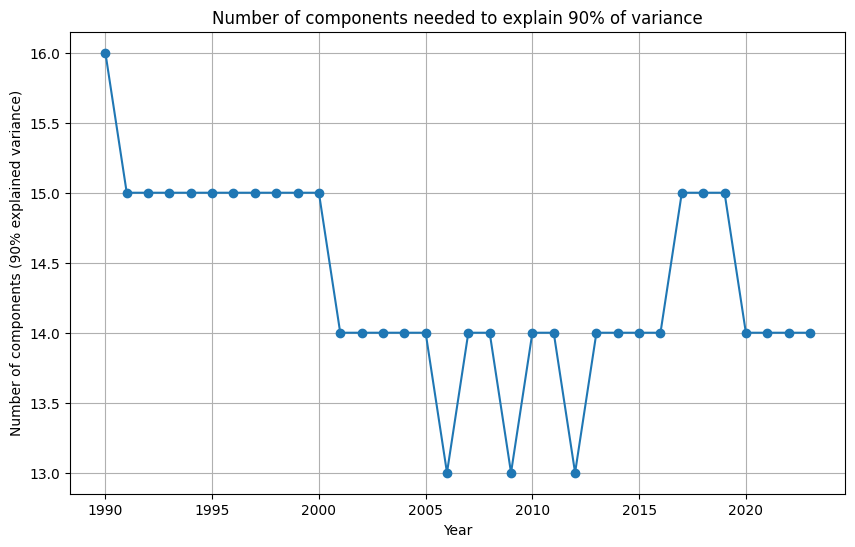

,year,n_components_90,total_var_90
0,1990,16,0.911685
1,1991,15,0.901110
2,1992,15,0.907804
3,1993,15,0.908575
4,1994,15,0.904459
5,1995,15,0.906635
6,1996,15,0.904971
7,1997,15,0.909047
8,1998,15,0.910147
9,1999,15,0.906189


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca_evol = []

for year in sorted(df_siec['TIME_PERIOD'].unique()):
    df_year = df_siec_log[df_siec_log['TIME_PERIOD'] == year]
    X = StandardScaler().fit_transform(df_year[siec_cols].fillna(0))
    
    pca = PCA().fit(X)
    cum_var = pca.explained_variance_ratio_.cumsum()
    
    n_components_90 = (cum_var < 0.90).sum() + 1
    
    pca_evol.append({
        "year": year,
        "n_components_90": n_components_90,
        "total_var_90": cum_var[n_components_90-1]
    })

pca_evol = pd.DataFrame(pca_evol)

plt.figure(figsize=(10,6))
plt.plot(pca_evol["year"], pca_evol["n_components_90"], marker="o", color="tab:blue")
plt.title("Number of components needed to explain 90% of variance")
plt.xlabel("Year")
plt.ylabel("Number of components (90% explained variance)")
plt.grid(True)
plt.show()

display(pca_evol)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

X = StandardScaler().fit_transform(df_siec_log[siec_cols].fillna(0))

pca = PCA(n_components=14)
X_pca = pca.fit_transform(X)

for i in range(14):
    df_siec_log[f"PC{i+1}"] = X_pca[:, i]

loadings = pd.DataFrame(
    pca.components_.T,
    index=siec_cols,
    columns=[f"PC{i+1}" for i in range(14)]
)

print("Explained variance per component (%):")
print(np.round(pca.explained_variance_ratio_ * 100, 2))
print("\nTotal cumulative explained variance: {:.2f}%".format(pca.explained_variance_ratio_.sum() * 100))

for i in range(14):
    pc = f"PC{i+1}"
    print(f"\n=== {pc} (explains {pca.explained_variance_ratio_[i]*100:.2f}% of variance) ===")
    print("Top positive loadings:")
    print(loadings[pc].sort_values(ascending=False).head(5))
    print("Top negative loadings:")
    print(loadings[pc].sort_values(ascending=True).head(5))

Explained variance per component (%):
[29.63 11.98  6.64  6.02  4.42  4.05  3.68  3.36  3.01  2.03  1.86  1.74
  1.5   1.34]

Total cumulative explained variance: 81.25%

=== PC1 (explains 29.63% of variance) ===
Top positive loadings:
GEP_Bioenergía         0.144065
DL_Bioenergía          0.143896
DL_total               0.136988
FC_IND_E_Bioenergía    0.136450
FC_E_Nuclear           0.136238
Name: PC1, dtype: float64
Top negative loadings:
FC_IND_E_Renovables_total     -0.018662
FC_E_Renovables_total         -0.018662
GEP_MAPCHP_Renovables_total   -0.017120
GHP_Renovables_total          -0.016665
GHP_MAPCHP_Renovables_total   -0.016645
Name: PC1, dtype: float64

=== PC2 (explains 11.98% of variance) ===
Top positive loadings:
TRANS_CAR             0.135738
TRANS_BUS_TOT         0.128392
TRANS_SEAV            0.127091
TRANS_AC              0.126607
GEP_MAPCHP_Nuclear    0.109014
Name: PC2, dtype: float64
Top negative loadings:
GEP_Gas        -0.208473
FC_OTH_E_Gas   -0.206154
FC_E_Gas 

C:\Users\joelm\AppData\Local\Temp\ipykernel_11128\1038164816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_siec_log[f"PC{i+1}"] = X_pca[:, i]
C:\Users\joelm\AppData\Local\Temp\ipykernel_11128\1038164816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_siec_log[f"PC{i+1}"] = X_pca[:, i]
C:\Users\joelm\AppData\Local\Temp\ipykernel_11128\1038164816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

| Componente | Varianza explicada | Variables dominantes (+)                                   | Variables dominantes (–)                    | **Interpretación conceptual**                                                                                                                      |
| ---------- | ------------------ | ---------------------------------------------------------- | ------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **PC1**    | 29.63 %            | Bioenergía total, demanda total, nuclear                   | Renovables totales (eléctrico / industrial) | **Escala general del sistema energético**: países con alto consumo y fuerte peso bioenergético/nuclear frente a estructuras pequeñas y renovables. |
| **PC2**    | 11.98 %            | Transporte (carretera, bus, aéreo, marítimo)               | Gas (todas las formas)                      | **Dependencia del transporte fósil vs. gas**: distingue economías donde domina el transporte de aquellas basadas en gas natural.                   |
| **PC3**    | 6.64 %             | Producción y consumo renovable (solar, eólica, hidráulica) | Nuclear / fósiles                           | **Eje renovables vs. convencionales**: mide el grado de transición energética limpia.                                                              |
| **PC4**    | 6.02 %             | Gas y carbón (producción y cogeneración)                   | Consumo total / nuclear                     | **Mix fósil intensivo**: países con alta generación a gas y carbón frente a sistemas más eléctricos o eficientes.                                  |
| **PC5**    | 4.42 %             | Solar y eólica en consumo final                            | Hidráulica / transporte                     | **Energías nuevas (solar-eólica) vs. hidráulica tradicional y transporte**.                                                                        |
| **PC6**    | 4.05 %             | Generación solar-eólica-hidráulica                         | Transporte terrestre                        | **Capacidad de generación renovable frente a demanda de transporte**.                                                                              |
| **PC7**    | 3.68 %             | Generación fósil diversificada (gas, carbón, bioenergía)   | Nuclear y bioenergía doméstica              | **Persistencia de fósiles mixtos vs. nuclear doméstica**.                                                                                          |
| **PC8**    | 3.36 %             | Nuclear / renovables modernas                              | Emisiones (CO₂, CH₄, N₂O, GHG)              | **Eficiencia ambiental**: mayor participación nuclear-renovable implica menores emisiones.                                                         |
| **PC9**    | 3.01 %             | Hidráulica, solar, eólica                                  | Carbón / PIB                                | **Dependencia renovable tradicional frente a tamaño económico y carbón.**                                                                          |
| **PC10**   | 2.03 %             | Petróleo en transporte + carbón                            | Gas / PIB                                   | **Uso intensivo de petróleo en transporte frente a economías gas-intensivas.**                                                                     |
| **PC11**   | 1.86 %             | Electricidad solar / eólica doméstica                      | Petróleo / hidráulica                       | **Generación distribuida e innovación residencial.**                                                                                               |
| **PC12**   | 1.74 %             | Transporte con fósiles (petróleo, gas, carbón)             | Hidráulica / nuclear                        | **Eje transporte fósil vs. fuentes limpias tradicionales.**                                                                                        |
| **PC13**   | 1.50 %             | Consumo eléctrico anual, PIB, gas / nuclear                | Bioenergía / transporte marítimo            | **Demanda eléctrica asociada al crecimiento económico.**                                                                                           |
| **PC14**   | 1.34 %             | Carbón, petróleo, gas en demanda final                     | Nuclear / carbón industrial                 | **Dependencia residual de combustibles fósiles tradicionales.**                                                                                    |


In [4]:
var_exp = pca.explained_variance_ratio_

grupos = {
    "energia": [0, 3],
    "transporte": [1, 9, 11, 13],
    "renovables": [2, 4, 5, 8],
    "emisiones": [7],
    "economia": [6, 10, 12]
}

for nombre, idx in grupos.items():
    cols = [f"PC{i+1}" for i in idx]
    pesos = pd.Series(var_exp[idx] / var_exp[idx].sum(), index=cols)
    df_siec_log[f"PC_macro_{nombre}"] = df_siec_log[cols].mul(pesos, axis=1).sum(axis=1)

C:\Users\joelm\AppData\Local\Temp\ipykernel_11128\216032712.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_siec_log[f"PC_macro_{nombre}"] = df_siec_log[cols].mul(pesos, axis=1).sum(axis=1)
C:\Users\joelm\AppData\Local\Temp\ipykernel_11128\216032712.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_siec_log[f"PC_macro_{nombre}"] = df_siec_log[cols].mul(pesos, axis=1).sum(axis=1)
C:\Users\joelm\AppData\Local\Temp\ipykernel_11128\216032712.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

| Grupo          | Componentes                                    | Peso relativo aproximado  | Significado                      |
| -------------- | ---------------------------------------------- | ------------------------- | -------------------------------- |
| **Energía**    | PC1 (≈30%), PC4 (≈6%)                          | PC1 pesa ~83 %, PC4 ~17 % | Escala energética y mix fósil.   |
| **Transporte** | PC2 (12%), PC10 (2%), PC12 (1.7%), PC14 (1.3%) | PC2 domina (~70 %)        | Transporte fósil y petróleo.     |
| **Renovables** | PC3 (6.6%), PC5 (4.4%), PC6 (4%), PC9 (3%)     | Parejos, 25–35 % cada uno | Transición renovable.            |
| **Emisiones**  | PC8 (3.4%)                                     | —                         | Eficiencia ambiental.            |
| **Economía**   | PC7 (3.7%), PC11 (1.9%), PC13 (1.5%)           | PC7 domina (~50 %)        | Demanda eléctrica y crecimiento. |


In [10]:
import geopandas as gpd
import pandas as pd
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
gdf_europe = gpd.read_file(url)
gdf_europe = gdf_europe[gdf_europe["CONTINENT"] == "Europe"].copy()

iso_map = {
    "ALB": "AL", "AUT": "AT", "BEL": "BE", "BGR": "BG", "HRV": "HR", "CYP": "CY", "CZE": "CZ", 
    "DNK": "DK", "EST": "EE", "FIN": "FI", "FRA": "FR", "DEU": "DE", "GRC": "EL", "HUN": "HU",
    "ISL": "IS", "IRL": "IE", "ITA": "IT", "LVA": "LV", "LTU": "LT", "LUX": "LU", "MLT": "MT",
    "NLD": "NL", "NOR": "NO", "POL": "PL", "PRT": "PT", "ROU": "RO", "SVK": "SK", "SVN": "SI",
    "ESP": "ES", "SWE": "SE", "CHE": "CH", "GBR": "UK", "SRB": "RS", "MNE": "ME", "MKD": "MK",
    "BIH": "BA", "UKR": "UA", "MDA": "MD", "GEO": "GE", "TUR": "TR", "XKX": "XK"
}
gdf_europe["geo"] = gdf_europe["ISO_A3"].map(iso_map)

macro_cols = [
    "PC_macro_energia",
    "PC_macro_transporte",
    "PC_macro_renovables",
    "PC_macro_emisiones",
    "PC_macro_economia"
]

df_grouped = df_siec_log[["geo", "TIME_PERIOD"] + macro_cols].copy()

macro_selector = widgets.Dropdown(
    options=macro_cols,
    value="PC_macro_energia",
    description="Dimension:",
    style={'description_width': 'initial'}
)

year_slider = widgets.IntSlider(
    value=2020,
    min=df_grouped["TIME_PERIOD"].min(),
    max=df_grouped["TIME_PERIOD"].max(),
    step=1,
    description="Year:",
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

def update_map(macro, year):
    clear_output(wait=True)
    
    display(widgets.HBox([macro_selector, year_slider]))
    
    df_year = df_grouped[df_grouped["TIME_PERIOD"] == year]
    gdf_merge = gdf_europe.merge(df_year, on="geo", how="left")
    gdf_merge["geo"] = gdf_merge["geo"].fillna("NO DATA")

    m = folium.Map(location=[54, 15], zoom_start=4, tiles="CartoDB positron")
    
    folium.Choropleth(
        geo_data=gdf_merge.to_json(),
        data=gdf_merge,
        columns=["geo", macro],
        key_on="feature.properties.geo",
        fill_color="RdYlGn",
        fill_opacity=0.8,
        line_opacity=0.2,
        nan_fill_color="lightgrey",
        legend_name=f"{macro.replace('PC_macro_', '').replace('_', ' ').title()} ({year})"
    ).add_to(m)
    
    folium.GeoJson(
        gdf_merge.to_json(),
        tooltip=folium.GeoJsonTooltip(
            fields=["NAME", macro],
            aliases=["Country:", "Value:"],
            localize=True
        )
    ).add_to(m)
    
    display(m)

widgets.interactive(update_map, macro=macro_selector, year=year_slider)

interactive(children=(Dropdown(description='Dimension:', options=('PC_macro_energia', 'PC_macro_transporte', '…

C:\Users\joelm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.2728854515268191


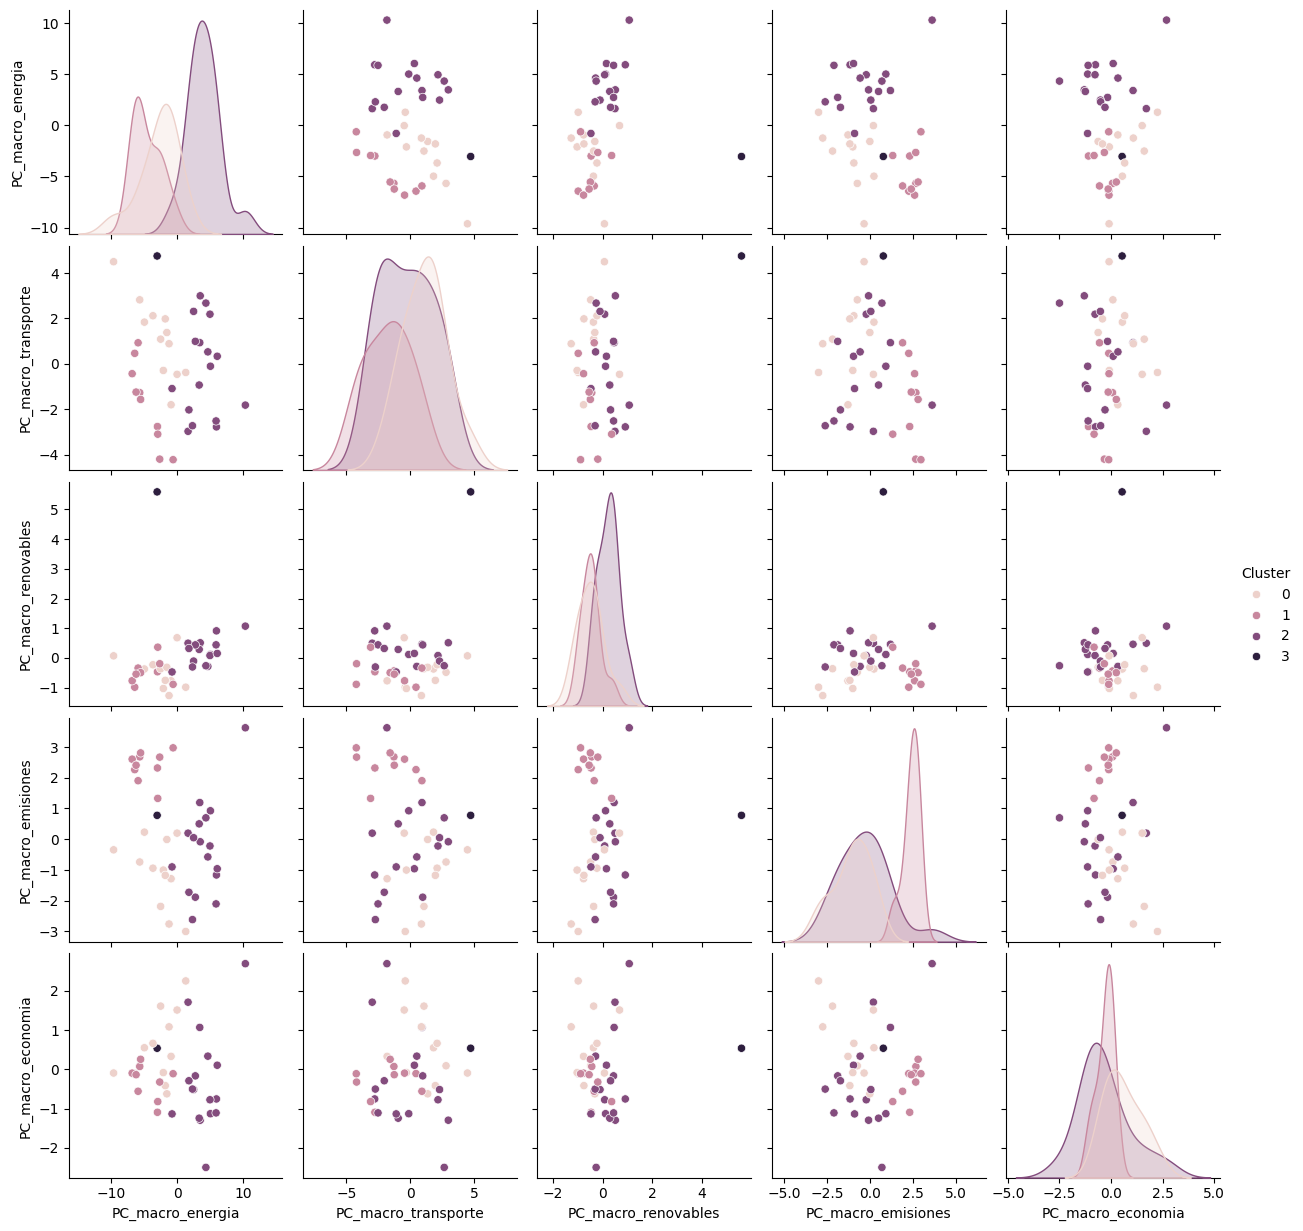

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

df_avg = df_siec_log.groupby("geo")[[
    "PC_macro_energia",
    "PC_macro_transporte",
    "PC_macro_renovables",
    "PC_macro_emisiones",
    "PC_macro_economia"
]].mean().reset_index()

X = StandardScaler().fit_transform(df_avg.iloc[:, 1:])
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
df_avg["Cluster"] = labels

print("Silhouette score:", silhouette_score(X, labels))

sns.pairplot(df_avg, hue="Cluster", diag_kind="kde")
plt.show()

Best number of clusters (Silhouette): 2 with score = 0.427


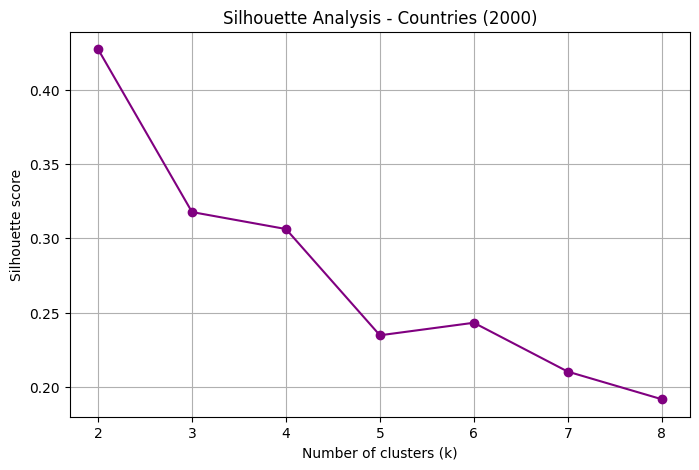

In [7]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

año = 2000
df_year = df_siec_log[df_siec_log["TIME_PERIOD"] == año].copy()

pc_cols = [f"PC{i+1}" for i in range(14)]
assert all(col in df_year.columns for col in pc_cols), "Missing PCA components in df_siec_log"

var_exp = np.array([29.63, 11.98, 6.64, 6.02, 4.42, 4.05, 3.68, 3.36, 3.01, 2.03, 1.86, 1.73, 1.50, 1.34])
var_exp_norm = var_exp / var_exp.sum()

X = df_year[pc_cols].values
X_scaled = StandardScaler().fit_transform(X)
X_weighted = X_scaled * var_exp_norm

sil_scores = []
K_range = range(2, 9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_weighted)
    score = silhouette_score(X_weighted, labels)
    sil_scores.append(score)

best_k = K_range[np.argmax(sil_scores)]
print(f"Best number of clusters (Silhouette): {best_k} with score = {max(sil_scores):.3f}")

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o', color='purple')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title(f"Silhouette Analysis - Countries ({año})")
plt.grid(True)
plt.show()

,Num_countries,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC_macro_energia,PC_macro_transporte,PC_macro_renovables,PC_macro_emisiones,PC_macro_economia,Countries
Cluster,,,,,,,,,,,,,,,,,,,,,
0,13,-3.45,-3.09,0.02,-0.52,-0.16,0.52,0.13,-0.24,-0.64,...,0.60,-0.48,-0.67,0.01,-2.96,-2.26,-0.02,-0.24,0.08,"BG, EL, HR, IE, LT, LV, MK, PT, RS, SI, SK, TR..."
1,16,3.36,-1.10,-0.07,-0.89,1.31,1.76,-0.60,-0.88,0.18,...,0.00,-0.39,0.16,0.73,2.64,-0.85,0.72,-0.88,-0.28,"AT, BE, CZ, DE, DK, ES, FI, FR, HU, IT, NL, NO..."
2,6,-7.06,1.71,1.80,-0.06,0.34,1.03,0.11,0.30,0.27,...,0.45,-0.80,0.37,0.15,-5.88,1.14,1.02,0.30,0.25,"AL, CY, EE, IS, LU, XK"
3,1,-15.61,7.01,-2.59,8.11,3.39,2.85,0.31,-0.58,2.78,...,-1.71,0.36,1.47,0.04,-11.60,4.75,0.97,-0.58,0.02,MT


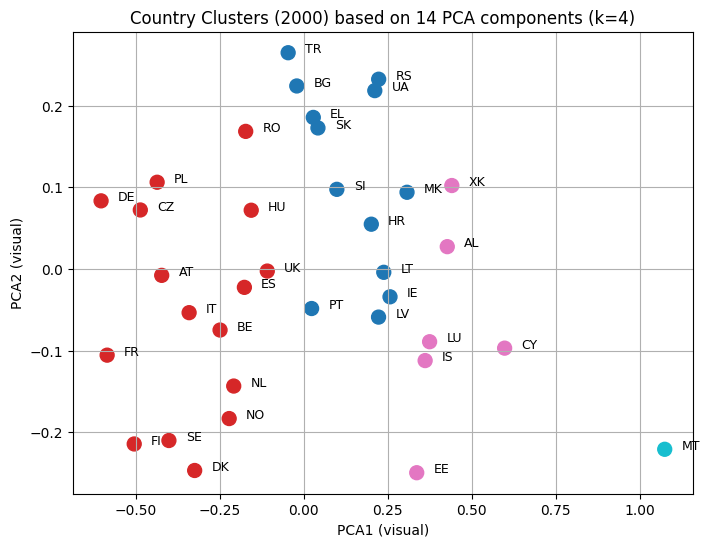

In [8]:
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init="auto")
df_year["Cluster"] = kmeans.fit_predict(X_weighted)

macro_cols = [col for col in df_year.columns if col.startswith("PC_macro_")]

cluster_summary = (
    df_year.groupby("Cluster")[pc_cols + macro_cols]
    .mean()
    .round(2)
)

cluster_summary["Num_countries"] = df_year.groupby("Cluster")["geo"].count()
cluster_summary["Countries"] = df_year.groupby("Cluster")["geo"].apply(lambda x: ", ".join(sorted(x)))
cols = ["Num_countries"] + pc_cols + macro_cols + ["Countries"]
cluster_summary = cluster_summary[cols]

display(cluster_summary)

from sklearn.decomposition import PCA

pca_vis = PCA(n_components=2)
X_2d = pca_vis.fit_transform(X_weighted)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df_year["Cluster"], cmap="tab10", s=100)
for i, txt in enumerate(df_year["geo"]):
    plt.text(X_2d[i,0]+0.05, X_2d[i,1], txt, fontsize=9)
plt.title(f"Country Clusters ({año}) based on 14 PCA components (k={chosen_k})")
plt.xlabel("PCA1 (visual)")
plt.ylabel("PCA2 (visual)")
plt.grid(True)
plt.show()

| Cluster | Países                                                                          | Principales rasgos                                                                                                         | Interpretación general                                                                                                                                                                                                                                               |
| ------- | ------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0**   | 🇬🇷 🇭🇷 🇮🇪 🇱🇻 🇱🇹 🇲🇰 🇵🇹 🇧🇬 🇸🇮 🇷🇸 🇹🇷 🇸🇰 🇲                  | PC_macro_energia = -2.96 · PC_macro_transporte = -2.27 · PC_macro_renovables ≈ 0 · PC_macro_emisiones = -0.24      |  **Europa Sur-Este emergente.** Países con bajo consumo energético y transporte menos intensivo. Emisiones contenidas, con economías en transición. Se trata de naciones con estructuras energéticas aún dependientes de fósiles pero con menor industrialización. |
| **1**   | 🇩🇪 🇫🇷 🇮🇹 🇳🇱 🇩🇰 🇫🇮 🇧🇪 🇦🇹 🇳🇴 🇪🇸 🇵🇱 🇭🇺 🇨🇿 🇸🇪 🇱🇺 🇬🇧 | PC_macro_energia = +2.64 · PC_macro_transporte = -0.85 · PC_macro_renovables = +0.72 · PC_macro_emisiones = -0.88  |  **Europa Occidental-Nórdica avanzada.** Alta intensidad energética con fuerte base industrial, pero a la vez impulso de renovables y control de emisiones. Economías maduras con inversión en transición energética.                                              |
| **2**   | 🇦🇱 🇨🇾 🇪🇪 🇮🇸 🇱🇺 🇽🇰                                                   | PC_macro_energia = -5.88 · PC_macro_transporte = +1.14 · PC_macro_renovables = +1.02 · PC_macro_emisiones = +0.30  |  **Pequeñas economías periféricas o insulares.** Bajo nivel energético general, pero mayor intensidad en transporte y cierta adopción renovable. Algunos (🇮🇸, 🇪🇪) destacan por liderazgo verde, otros por dependencia externa.                                 |
| **3**   | 🇲🇹 (solo Malta)                                                               | PC_macro_energia = -11.60 · PC_macro_transporte = +4.75 · PC_macro_renovables = +0.97 · PC_macro_emisiones = -0.58 |  **Caso outlier.** Malta tiene un patrón energético muy singular: pequeña economía con enorme intensidad de transporte (turismo) y emisiones controladas por tamaño. Aislado del resto del continente en escala y dependencia energética.                          |


Best number of clusters (Silhouette): 2 with score = 0.422


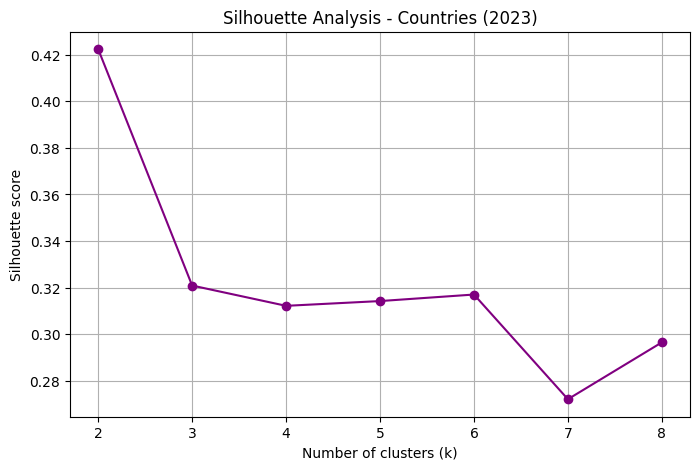

,Num_countries,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC_macro_energia,PC_macro_transporte,PC_macro_renovables,PC_macro_emisiones,PC_macro_economia,Countries
Cluster,,,,,,,,,,,,,,,,,,,,,
0,13,8.52,3.35,-1.08,0.57,-0.23,-0.72,-0.62,1.17,1.03,...,0.00,-0.12,-0.25,0.32,7.18,2.38,-0.44,1.17,-0.38,"AT, BE, CZ, DE, DK, FI, FR, HU, IT, NL, NO, PL..."
1,8,-6.66,0.82,-1.07,0.18,-0.68,-1.31,-0.31,1.86,-0.68,...,-0.01,0.08,1.13,0.99,-5.51,0.63,-0.96,1.86,0.07,"AL, BA, IS, MD, ME, MK, MT, XK"
2,11,0.33,3.73,-0.33,0.30,-1.54,-1.94,0.69,-0.70,-0.57,...,-0.17,0.30,-0.58,0.03,0.33,2.70,-1.03,-0.70,0.19,"CY, EE, EL, ES, HR, IE, LT, LU, LV, PT, SI"
3,5,3.21,-2.04,0.81,1.81,-1.25,-2.69,0.24,0.87,-0.02,...,-0.07,-1.32,0.87,-0.69,2.97,-1.59,-0.61,0.87,0.29,"BG, RO, RS, SK, TR"


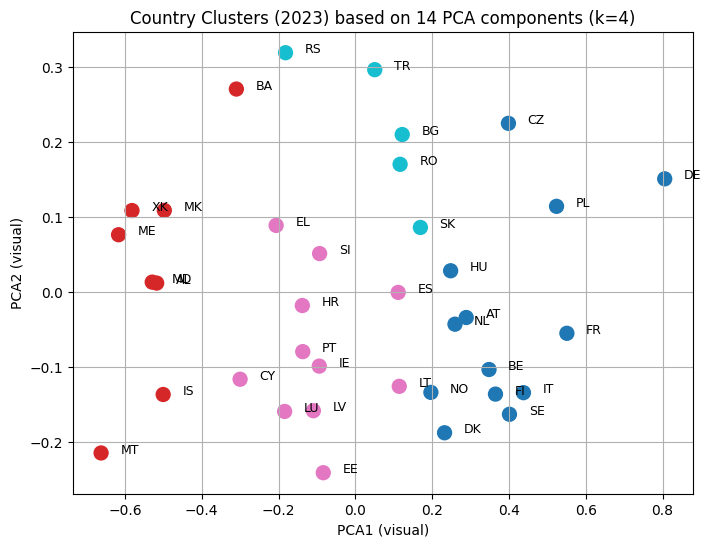

In [9]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

año = 2023
df_year = df_siec_log[df_siec_log["TIME_PERIOD"] == año].copy()

pc_cols = [f"PC{i+1}" for i in range(14)]
assert all(col in df_year.columns for col in pc_cols), "Missing PCA components in df_siec_log"

var_exp = np.array([29.63, 11.98, 6.64, 6.02, 4.42, 4.05, 3.68, 3.36, 3.01, 2.03, 1.86, 1.73, 1.50, 1.34])
var_exp_norm = var_exp / var_exp.sum()

X = df_year[pc_cols].values
X_scaled = StandardScaler().fit_transform(X)
X_weighted = X_scaled * var_exp_norm

sil_scores = []
K_range = range(2, 9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_weighted)
    score = silhouette_score(X_weighted, labels)
    sil_scores.append(score)

best_k = K_range[np.argmax(sil_scores)]
print(f"Best number of clusters (Silhouette): {best_k} with score = {max(sil_scores):.3f}")

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o', color='purple')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title(f"Silhouette Analysis - Countries ({año})")
plt.grid(True)
plt.show()

chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init="auto")
df_year["Cluster"] = kmeans.fit_predict(X_weighted)

macro_cols = [col for col in df_year.columns if col.startswith("PC_macro_")]

cluster_summary = (
    df_year.groupby("Cluster")[pc_cols + macro_cols]
    .mean()
    .round(2)
)

cluster_summary["Num_countries"] = df_year.groupby("Cluster")["geo"].count()
cluster_summary["Countries"] = df_year.groupby("Cluster")["geo"].apply(lambda x: ", ".join(sorted(x)))
cols = ["Num_countries"] + pc_cols + macro_cols + ["Countries"]
cluster_summary = cluster_summary[cols]

display(cluster_summary)

pca_vis = PCA(n_components=2)
X_2d = pca_vis.fit_transform(X_weighted)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df_year["Cluster"], cmap="tab10", s=100)
for i, txt in enumerate(df_year["geo"]):
    plt.text(X_2d[i,0]+0.05, X_2d[i,1], txt, fontsize=9)
plt.title(f"Country Clusters ({año}) based on 14 PCA components (k={chosen_k})")
plt.xlabel("PCA1 (visual)")
plt.ylabel("PCA2 (visual)")
plt.grid(True)
plt.show()

| Cluster | Países                                                                  | Principales rasgos                                                                                                | Interpretación general                                                                                                                                                                                                                                                                 |
| ------- | ----------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0**   | 🇩🇪 🇫🇷 🇮🇹 🇳🇱 🇩🇰 🇫🇮 🇦🇹 🇧🇪 🇳🇴 🇵🇱 🇭🇺 🇨🇿 (13 países) | PC_macro_energia = +7.18 · PC_macro_transporte = +2.38 · PC_macro_renovables = −0.44 · PC_macro_emisiones = +1.17 |  **Europa industrializada, alta demanda energética y de transporte.** Países con fuerte estructura económica, pero aún con dependencia fósil y emisiones considerables. Representa el bloque **industrial del norte y centro de Europa**, donde la transición energética es parcial. |
| **1**   | 🇦🇱 🇲🇪 🇲🇰 🇽🇰 🇧🇦 🇲🇩 🇮🇸 🇲🇹 (8 países)                      | PC_macro_energia = −5.51 · PC_macro_transporte = +0.63 · PC_macro_renovables = −0.96 · PC_macro_emisiones = +1.86 |  **Economías pequeñas o periféricas con bajo peso energético pero emisiones altas.** El alza en PC_macro_emisiones sugiere dependencia de fuentes fósiles o importadas. Refleja **vulnerabilidad energética** y baja capacidad de inversión verde.                                   |
| **2**   | 🇪🇸 🇬🇷 🇭🇷 🇮🇪 🇱🇹 🇱🇻 🇨🇾 🇪🇪 🇱🇺 🇵🇹 🇸🇮 (11 países)      | PC_macro_energia = +0.33 · PC_macro_transporte = +2.70 · PC_macro_renovables = −1.03 · PC_macro_emisiones = −0.70 |  **Transición verde intermedia (Europa sur y báltica).** Energía moderada, transporte elevado (turismo, movilidad interna), pero reducción relativa de emisiones. Son países **en transición energética consolidada**, con mejoras en eficiencia.                                    |
| **3**   | 🇧🇬 🇷🇴 🇷🇸 🇸🇰 🇹🇷 (5 países)                                     | PC_macro_energia = +2.97 · PC_macro_transporte = −1.59 · PC_macro_renovables = −0.61 · PC_macro_emisiones = +0.87 |  **Bloque del este industrial en desarrollo.** Incremento en consumo energético, moderada expansión industrial y aún rezago en renovables. Representa **países en expansión económica**, pero con una transición verde lenta.                                                        |
